

# Predicting Business Ratings with Yelp Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ad/Yelp_Logo.svg" style="float: left; margin: 20px; height: 106px">

### General Assembly - Data Science Course - March 2018
#### Lucien Rey

# Table of Content
1. Project Idea
2. Dataset
3. EDA
4. Model Results
5. Conclusion


# 1. Project Idea

- Predicting ratings for businesses listed on Yelp
- Ratings between a range of 1-3 and 4-5 for "BAD", and "GOOD", respectively.

## Plan of actions
1. Focus on Dataset
2. Add more variables, such as specific categories, open during weekend, tips, etc..
3. Add sentiment analysis on reviews and tips
4. Compare different models

# 2. The Dataset

# 2.1 The Dataset

- All available on their website and on kaggle
    - https://www.yelp.com/dataset
    - https://www.kaggle.com/yelp-dataset/yelp-dataset
- Large dataset available in JSON, SQL, CSV format
- Used 5 different .csv files:
    - yelp_business_attributes.csv: attributes from each business (Dogs allowed, Wifi available, etc..)
    - yelp_tips: all the tips, which are like reviews / short tip from customers.
    - yelp_business_hours: which contains the opening hours of each business.
    - yelp_reviews: contains all 5 millions reviews for each user



<img src="yelp_reviews.png" style="float: middle; height: 106px">

# 2.2 Data Cleanup
- Select only business that is open
- Added the attributes (92 columns) and reduce to NA threshold of 5000
- Group the different categories (54600) with threshold 1000 and added back to the dataset
- Added number of tips for each business
- Added dummy if the business is open on weekend or not
- Transform the target to Good/Bad

Dataset Shape = (146702, 165)

In [1]:
# import all packages
import numpy as np
import pandas as pd
import numba.cuda
from numba import jit
import cython
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from itertools import combinations
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
# Will display all rows
pd.set_option('display.max_columns', 500)


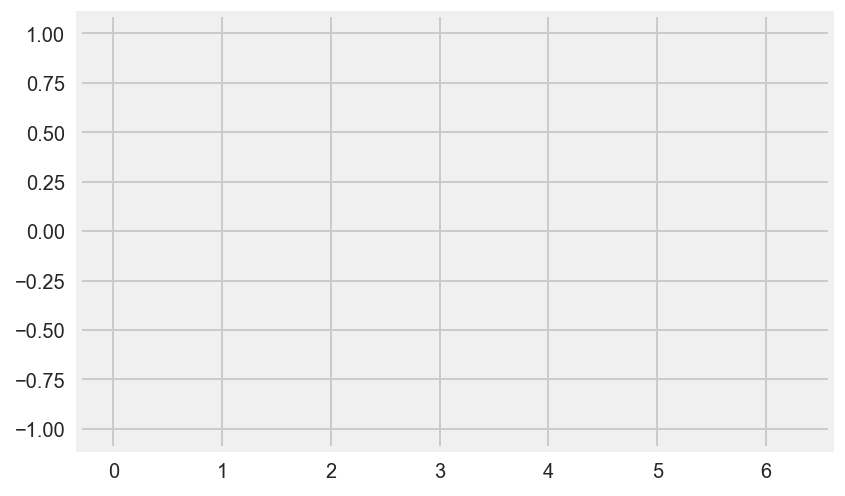